# Stretch Goals - Year over Year All-NBA Trend Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')

In [2]:
full_df = pd.read_csv('../Data/Final_NBA_PLayers_updated.csv')
all_nba1 = pd.read_csv('../Data/All_NBA_1.csv')
all_nba2 = pd.read_csv('../Data/All_NBA_2.csv')
all_nba3 = pd.read_csv('../Data/All_NBA_3.csv')

In [3]:
print(all_nba1.head())
print(all_nba2.head())
print(all_nba3.head())

   YEAR                 PLAYER POS                TEAM    FG%   PPG   RPG  \
0  2020           LeBron James   F  Los Angeles Lakers  0.493  25.3   7.8   
1  2020           James Harden   G     Houston Rockets  0.444  34.3   6.6   
2  2020          Anthony Davis   F  Los Angeles Lakers  0.503  26.1   9.3   
3  2020  Giannis Antetokounmpo   F     Milwaukee Bucks  0.553  29.5  13.6   
4  2020            Luka Doncic   G    Dallas Mavericks  0.463  28.8   9.4   

    APG  BLKPG  
0  10.2    0.5  
1   7.5    0.9  
2   3.2    2.3  
3   5.6    1.0  
4   8.8    0.2  
   YEAR          PLAYER POS                    TEAM    FG%   PPG  RPG  APG  \
0  2020      Chris Paul   G   Oklahoma City Thunder  0.489  17.6  5.0  6.7   
1  2020   Kawhi Leonard   F             LA Clippers   0.47  27.1  7.1  4.9   
2  2020  Damian Lillard   G  Portland Trail Blazers  0.463  30.0  4.3  8.0   
3  2020    Nikola Jokic   C          Denver Nuggets  0.528  19.9  9.7  7.0   
4  2020   Pascal Siakam   F         Toronto R

In [4]:
all_nba1['award_year'] = [str(x)[2:] for x in all_nba1['YEAR']]
all_nba1['concat'] = all_nba1['PLAYER'] + all_nba1['award_year']

all_nba2['award_year'] = [str(x)[2:] for x in all_nba2['YEAR']]
all_nba2['concat'] = all_nba2['PLAYER'] + all_nba2['award_year']

all_nba3['award_year'] = [str(x)[2:] for x in all_nba3['YEAR']]
all_nba3['concat'] = all_nba3['PLAYER'] + all_nba3['award_year']

In [5]:
all_nba1 = all_nba1[['YEAR','PLAYER', 'POS','TEAM','concat' ]]
all_nba1['All_NBA'] = 'First'

all_nba2 = all_nba2[['YEAR','PLAYER', 'POS','TEAM','concat' ]]
all_nba2['All_NBA'] = 'Second'

all_nba3 = all_nba3[['YEAR','PLAYER', 'POS','TEAM','concat' ]]
all_nba3['All_NBA'] = 'Third'

In [6]:
full_df = full_df[['concat','Age', 'WS', 'G',
       'GS', 'MP', 'FG', 'FGA', '2P', '2PA', '3P', '3PA', 'FT', 'FTA', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'FG%', '2P%',
       '3P%', 'eFG%', 'FT%', 'TS%','ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'ORtg',
       'DRtg', 'OWS', 'DWS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP','season_count']]

In [7]:
all_nba_total1 = all_nba1.merge(full_df,  how = 'left', on ='concat')
all_nba_total2 = all_nba2.merge(full_df,  how = 'left', on ='concat')
all_nba_total3 = all_nba3.merge(full_df,  how = 'left', on ='concat')

In [9]:
# all_nba_total.columns

In [54]:
all_nba_total = pd.concat([all_nba_total1,all_nba_total2,all_nba_total3])
all_nba_total = all_nba_total.reset_index(drop=True)
all_nba_total

TypeError: first argument must be an iterable of pandas objects, you passed an object of type "DataFrame"

In [25]:
all_nba_total.to_csv('../Data/YoY_Analysis.csv')

In [26]:
all_nba_total.sort_values(by=['YEAR', 'All_NBA'], inplace = True)
grouped = all_nba_total.groupby(['YEAR','All_NBA'], sort = False).mean()
grouped.head()

Age     WS     G  GS  MP     FG     FGA     2P     2PA  3P  \
YEAR All_NBA                                                                
1947 First    24.8  12.38  58.8 NaN NaN  356.2  1125.2  356.2  1125.2 NaN   
     Second   25.6   6.88  56.8 NaN NaN  287.8   981.0  287.8   981.0 NaN   
1948 First    26.2   8.44  46.8 NaN NaN  303.0  1001.8  303.0  1001.8 NaN   
     Second   25.2   6.76  47.2 NaN NaN  227.8   733.0  227.8   733.0 NaN   
1949 First    25.8  10.92  58.2 NaN NaN  433.6  1194.2  433.6  1194.2 NaN   

              ...  ORtg  DRtg   OWS   DWS  WS/48  OBPM  DBPM  BPM  VORP  \
YEAR All_NBA  ...                                                         
1947 First    ...   NaN   NaN  8.32  4.08    NaN   NaN   NaN  NaN   NaN   
     Second   ...   NaN   NaN  4.32  2.56    NaN   NaN   NaN  NaN   NaN   
1948 First    ...   NaN   NaN  5.76  2.72    NaN   NaN   NaN  NaN   NaN   
     Second   ...   NaN   NaN  4.42  2.32    NaN   NaN   NaN  NaN   NaN   
1949 First    ...   NaN   NaN  8.18  2.70    NaN   NaN   NaN  NaN   NaN   

              season_count  
YEAR All_NBA                
1947 First             1.0  
     Second            1.0  
1948 First             2.0  
     Second            1.6  
1949 First             1.8  

[5 rows x 46 columns]

In [27]:
all_nba_total
all_nba_total['PPG'] = all_nba_total['PTS'] / all_nba_total['G']

<AxesSubplot:xlabel='YEAR', ylabel='PPG'>

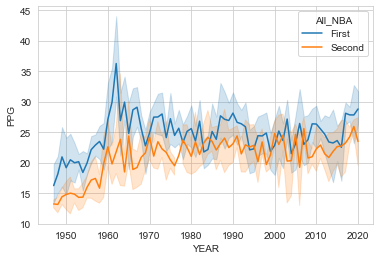

In [28]:
sns.lineplot(x = all_nba_total.YEAR, y = all_nba_total.PPG, hue = all_nba_total['All_NBA'])

<AxesSubplot:xlabel='YEAR', ylabel='Age'>

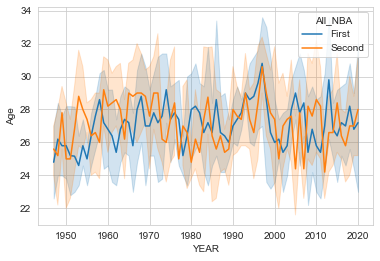

In [29]:
sns.lineplot(x = all_nba_total.YEAR, y = all_nba_total.Age, hue = all_nba_total['All_NBA'])

<AxesSubplot:xlabel='YEAR', ylabel='season_count'>

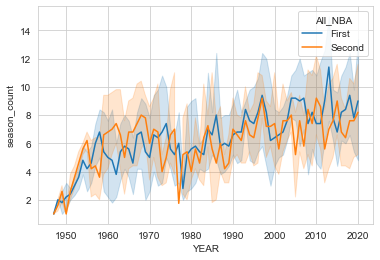

In [30]:
sns.lineplot(x = all_nba_total.YEAR, y = all_nba_total.season_count, hue = all_nba_total['All_NBA'])

<AxesSubplot:xlabel='YEAR', ylabel='VORP'>

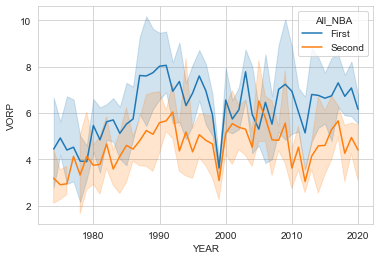

In [31]:
sns.lineplot(x = all_nba_total.YEAR, y = all_nba_total.VORP, hue = all_nba_total['All_NBA'])

<AxesSubplot:xlabel='YEAR', ylabel='WS'>

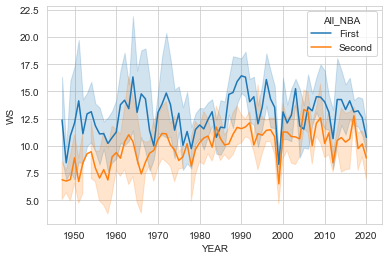

In [32]:
sns.lineplot(x = all_nba_total.YEAR, y = all_nba_total.WS, hue = all_nba_total['All_NBA'])

In [33]:
#1999 was a shortened lockout season, games didn't start until Feb
all_nba_total[all_nba_total['YEAR'] == 1999]

,YEAR,PLAYER,POS,TEAM,concat,All_NBA,Age,WS,G,GS,...,DRtg,OWS,DWS,WS/48,OBPM,DBPM,BPM,VORP,season_count,PPG
105,1999,Tim Duncan,F,San Antonio Spurs,Tim Duncan99,First,22.0,8.7,50.0,50.0,...,91.0,4.0,4.7,0.213,2.7,1.8,4.5,3.2,2.0,21.680000
106,1999,Allen Iverson,G,Philadelphia 76ers,Allen Iverson99,First,23.0,7.2,48.0,48.0,...,99.0,4.3,2.9,0.173,5.1,0.6,5.7,3.9,3.0,26.750000
107,1999,Jason Kidd,G,Phoenix Suns,Jason Kidd99,First,25.0,8.1,50.0,50.0,...,102.0,5.8,2.3,0.188,4.4,1.1,5.5,3.9,5.0,16.920000
108,1999,Karl Malone,F,Utah Jazz,Karl Malone99,First,35.0,9.6,49.0,49.0,...,96.0,6.2,3.4,0.252,5.3,1.4,6.7,4.0,14.0,23.755102
109,1999,Alonzo Mourning,C,Miami Heat,Alonzo Mourning99,First,28.0,7.9,46.0,46.0,...,93.0,4.0,3.9,0.216,2.7,2.3,4.9,3.1,7.0,20.086957
476,1999,Tim Hardaway,G,Miami Heat,Tim Hardaway99,Second,32.0,5.4,48.0,48.0,...,102.0,3.4,1.9,0.146,4.2,-0.8,3.3,2.4,9.0,17.395833
477,1999,Grant Hill,F,Detroit Pistons,Grant Hill99,Second,26.0,7.3,50.0,50.0,...,98.0,4.5,2.8,0.189,4.8,1.4,6.2,3.8,5.0,21.060000
478,1999,Shaquille O'Neal,C,Los Angeles Lakers,Shaquille O'Neal99,Second,26.0,9.0,49.0,49.0,...,102.0,7.2,1.9,0.255,7.5,-0.4,7.1,3.9,7.0,26.306122
479,1999,Gary Payton,G,Seattle SuperSonics,Gary Payton99,Second,30.0,7.2,50.0,50.0,...,106.0,6.0,1.2,0.172,5.1,0.0,5.1,3.6,9.0,21.680000
480,1999,Chris Webber,F,Sacramento Kings,Chris Webber99,Second,25.0,3.6,42.0,42.0,...,98.0,1.0,2.7,0.102,0.8,1.1,1.9,1.7,6.0,19.976190


In [34]:
all_nba_total.columns

Index(['YEAR', 'PLAYER', 'POS', 'TEAM', 'concat', 'All_NBA', 'Age', 'WS', 'G',
       'GS', 'MP', 'FG', 'FGA', '2P', '2PA', '3P', '3PA', 'FT', 'FTA', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'FG%', '2P%',
       '3P%', 'eFG%', 'FT%', 'TS%', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'ORtg', 'DRtg', 'OWS', 'DWS', 'WS/48', 'OBPM',
       'DBPM', 'BPM', 'VORP', 'season_count', 'PPG'],
      dtype='object')

In [35]:
all_nba_total

,YEAR,PLAYER,POS,TEAM,concat,All_NBA,Age,WS,G,GS,...,DRtg,OWS,DWS,WS/48,OBPM,DBPM,BPM,VORP,season_count,PPG
366,1947,Bob Feerick,NaN,Washington Capitols,Bob Feerick47,First,27.0,18.6,55.0,NaN,...,NaN,14.1,4.5,NaN,NaN,NaN,NaN,NaN,1.0,16.836364
367,1947,Joe Fulks,FC,Philadelphia Warriors,Joe Fulks47,First,25.0,16.3,60.0,NaN,...,NaN,13.0,3.3,NaN,NaN,NaN,NaN,NaN,1.0,23.150000
368,1947,Bones McKinney,NaN,Washington Capitols,Bones McKinney47,First,28.0,7.1,58.0,NaN,...,NaN,2.2,4.9,NaN,NaN,NaN,NaN,NaN,1.0,11.982759
369,1947,Stan Miasek,NaN,Detroit Falcons,Stan Miasek47,First,23.0,10.3,60.0,NaN,...,NaN,4.7,5.7,NaN,NaN,NaN,NaN,NaN,1.0,14.916667
370,1947,Max Zaslofsky,NaN,Chicago Stags,Max Zaslofsky47,First,21.0,9.6,61.0,NaN,...,NaN,7.6,2.0,NaN,NaN,NaN,NaN,NaN,1.0,14.377049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,2020,Chris Paul,G,Oklahoma City Thunder,Chris Paul20,Second,34.0,8.9,70.0,70.0,...,108.0,5.9,3.0,0.193,3.0,1.4,4.4,3.5,15.0,17.600000
372,2020,Kawhi Leonard,F,LA Clippers,Kawhi Leonard20,Second,28.0,8.7,57.0,57.0,...,104.0,5.4,3.3,0.226,6.5,2.4,8.9,5.1,9.0,27.070175
373,2020,Damian Lillard,G,Portland Trail Blazers,Damian Lillard20,Second,29.0,11.6,66.0,66.0,...,117.0,10.9,0.7,0.225,8.3,-0.9,7.5,5.9,8.0,29.969697
374,2020,Nikola Jokic,C,Denver Nuggets,Nikola Jokic20,Second,24.0,9.8,73.0,73.0,...,108.0,6.7,3.1,0.202,5.5,2.0,7.4,5.5,5.0,19.945205


### Which All-NBA team was statistically the best?

In [36]:
all_nba_total1.head()

,YEAR,PLAYER,POS,TEAM,concat,All_NBA,Age,WS,G,GS,...,ORtg,DRtg,OWS,DWS,WS/48,OBPM,DBPM,BPM,VORP,season_count
0,2020,LeBron James,F,Los Angeles Lakers,LeBron James20,First,35.0,9.8,67,67.0,...,116.0,106.0,6.2,3.6,0.204,6.6,1.8,8.4,6.1,17
1,2020,James Harden,G,Houston Rockets,James Harden20,First,30.0,13.1,68,68.0,...,120.0,108.0,9.9,3.2,0.254,8.1,1.6,9.6,7.3,11
2,2020,Anthony Davis,F,Los Angeles Lakers,Anthony Davis20,First,26.0,11.1,62,62.0,...,121.0,102.0,6.7,4.4,0.250,5.4,2.6,8.0,5.4,8
3,2020,Giannis Antetokounmpo,F,Milwaukee Bucks,Giannis Antetokounmpo20,First,25.0,11.1,63,63.0,...,116.0,97.0,6.1,5.0,0.279,7.4,4.1,11.5,6.6,7
4,2020,Luka Doncic,G,Dallas Mavericks,Luka Doncic20,First,20.0,8.8,61,61.0,...,116.0,110.0,6.5,2.3,0.207,7.4,1.0,8.4,5.4,2


In [39]:
all_nba_total1.columns

Index(['YEAR', 'PLAYER', 'POS', 'TEAM', 'concat', 'All_NBA', 'Age', 'WS', 'G',
       'GS', 'MP', 'FG', 'FGA', '2P', '2PA', '3P', '3PA', 'FT', 'FTA', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'FG%', '2P%',
       '3P%', 'eFG%', 'FT%', 'TS%', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'ORtg', 'DRtg', 'OWS', 'DWS', 'WS/48', 'OBPM',
       'DBPM', 'BPM', 'VORP', 'season_count'],
      dtype='object')

In [40]:
all_nba_total1['ppg'] = all_nba_total1['PTS'] / all_nba_total1['G']
all_nba_total1['apg'] = all_nba_total1['AST'] / all_nba_total1['G']
all_nba_total1['rpg'] = all_nba_total1['TRB'] / all_nba_total1['G']
all_nba_total1['spg'] = all_nba_total1['STL'] / all_nba_total1['G']
all_nba_total1['bpg'] = all_nba_total1['BLK'] / all_nba_total1['G']

In [41]:
all_nba_total1.head()

,YEAR,PLAYER,POS,TEAM,concat,All_NBA,Age,WS,G,GS,...,OBPM,DBPM,BPM,VORP,season_count,ppg,apg,rpg,spg,bpg
0,2020,LeBron James,F,Los Angeles Lakers,LeBron James20,First,35.0,9.8,67,67.0,...,6.6,1.8,8.4,6.1,17,25.343284,10.208955,7.835821,1.164179,0.537313
1,2020,James Harden,G,Houston Rockets,James Harden20,First,30.0,13.1,68,68.0,...,8.1,1.6,9.6,7.3,11,34.338235,7.529412,6.558824,1.838235,0.882353
2,2020,Anthony Davis,F,Los Angeles Lakers,Anthony Davis20,First,26.0,11.1,62,62.0,...,5.4,2.6,8.0,5.4,8,26.096774,3.225806,9.306452,1.467742,2.306452
3,2020,Giannis Antetokounmpo,F,Milwaukee Bucks,Giannis Antetokounmpo20,First,25.0,11.1,63,63.0,...,7.4,4.1,11.5,6.6,7,29.476190,5.619048,13.587302,0.968254,1.047619
4,2020,Luka Doncic,G,Dallas Mavericks,Luka Doncic20,First,20.0,8.8,61,61.0,...,7.4,1.0,8.4,5.4,2,28.836066,8.819672,9.393443,1.016393,0.229508


In [42]:
df = all_nba_total1[all_nba_total1['YEAR'] > 1977]

In [48]:
df.groupby('YEAR')['ppg','apg','rpg','spg','bpg','Age'].mean()

<ipython-input-48-fdd2eae3c2e7>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('YEAR')['ppg','apg','rpg','spg','bpg','Age'].mean()


,ppg,apg,rpg,spg,bpg,Age
YEAR,,,,,,
1978,23.327854,3.816161,9.082233,1.311518,1.474086,25.2
1979,25.144244,3.168782,8.861012,1.293483,1.276525,26.4
1980,25.600625,4.250156,7.205378,1.554534,1.459099,28.0
1981,23.575135,4.038660,7.778804,1.535706,1.373211,28.2
1982,26.816050,4.145228,8.085073,1.581550,1.032143,27.8
1983,21.764448,5.037231,9.507073,1.656938,1.125713,26.6
1984,22.167647,7.111138,6.769299,1.642184,0.803096,27.2
1985,25.128468,7.685557,7.995576,1.505537,0.737601,26.6
1986,23.838953,7.270891,6.660970,1.686389,0.675538,28.6


In [49]:
df_sum = df.groupby('YEAR')['ppg','apg','rpg','spg','bpg','Age'].mean()

<ipython-input-49-e4493c8b35dd>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_sum = df.groupby('YEAR')['ppg','apg','rpg','spg','bpg','Age'].mean()


In [51]:
df_sum['stats'] = df_sum.ppg + df_sum.apg + df_sum.rpg + df_sum.spg + df_sum.bpg

In [52]:
df_sum

,ppg,apg,rpg,spg,bpg,Age,stats
YEAR,,,,,,,
1978,23.327854,3.816161,9.082233,1.311518,1.474086,25.2,39.011852
1979,25.144244,3.168782,8.861012,1.293483,1.276525,26.4,39.744045
1980,25.600625,4.250156,7.205378,1.554534,1.459099,28.0,40.069794
1981,23.575135,4.038660,7.778804,1.535706,1.373211,28.2,38.301517
1982,26.816050,4.145228,8.085073,1.581550,1.032143,27.8,41.660045
1983,21.764448,5.037231,9.507073,1.656938,1.125713,26.6,39.091404
1984,22.167647,7.111138,6.769299,1.642184,0.803096,27.2,38.493365
1985,25.128468,7.685557,7.995576,1.505537,0.737601,26.6,43.052739
1986,23.838953,7.270891,6.660970,1.686389,0.675538,28.6,40.132741


In [60]:
import pandas as pd

df = pd.read_csv('../Data/YoY_Analysis.csv', index_col = 0)
df = df[['YEAR','All_NBA', 'PLAYER', 'TEAM', 'Age', 'PTS', 'AST', 'TRB']]
df.head()

,YEAR,All_NBA,PLAYER,TEAM,Age,PTS,AST,TRB
0,2020,First,LeBron James,Los Angeles Lakers,35.0,1698.0,684.0,525.0
1,2020,First,James Harden,Houston Rockets,30.0,2335.0,512.0,446.0
2,2020,First,Anthony Davis,Los Angeles Lakers,26.0,1618.0,200.0,577.0
3,2020,First,Giannis Antetokounmpo,Milwaukee Bucks,25.0,1857.0,354.0,856.0
4,2020,First,Luka Doncic,Dallas Mavericks,20.0,1759.0,538.0,573.0


In [62]:
import dataframe_image as dfi

In [63]:
dfi.export(df.head(), 'dataframe.png')

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 0 to 739
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   YEAR     740 non-null    int64  
 1   All_NBA  740 non-null    object 
 2   PLAYER   740 non-null    object 
 3   TEAM     740 non-null    object 
 4   Age      739 non-null    float64
 5   PTS      739 non-null    float64
 6   AST      739 non-null    float64
 7   TRB      699 non-null    float64
dtypes: float64(4), int64(1), object(3)
memory usage: 52.0+ KB


In [69]:
df.sort_values('PTS')

,YEAR,All_NBA,PLAYER,TEAM,Age,PTS,AST,TRB
731,1948,Second,Buddy Jeannette,Baltimore Bullets,30.0,491.0,70.0,NaN
459,2003,Second,Ben Wallace,Detroit Pistons,28.0,506.0,120.0,1126.0
718,1951,Second,Dick McGuire,New York Knicks,25.0,537.0,400.0,334.0
723,1950,Second,Al Cervi,Syracuse Nationals,32.0,573.0,264.0,NaN
361,1948,First,Howie Dallmar,Philadelphia Warriors,25.0,587.0,120.0,NaN
...,...,...,...,...,...,...,...,...
299,1961,First,Wilt Chamberlain,Philadelphia Warriors,24.0,3033.0,148.0,2149.0
166,1987,First,Michael Jordan,Chicago Bulls,23.0,3041.0,377.0,430.0
656,1963,Second,Wilt Chamberlain,San Francisco Warriors,26.0,3586.0,275.0,1946.0
293,1962,First,Wilt Chamberlain,Philadelphia Warriors,25.0,4029.0,192.0,2052.0


In [71]:
annual_averages = df.groupby('YEAR')['PTS', 'AST','TRB'].mean()

annual_averages.head()

<ipython-input-71-34f678ce447f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  annual_averages = df.groupby('YEAR')['PTS', 'AST','TRB'].mean()


,PTS,AST,TRB
YEAR,,,
1947,852.9,73.4,NaN
1948,733.9,58.7,NaN
1949,1031.5,179.1,NaN
1950,1099.4,218.1,NaN
1951,1175.3,243.6,556.7


In [72]:
dfi.export(annual_averages.head(), 'dataframe.png')

In [74]:
import matplotlib.pyplot as plt

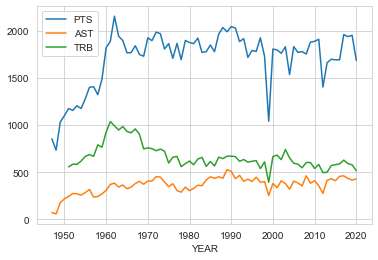

In [75]:
annual_averages.plot()
plt.savefig('averages')

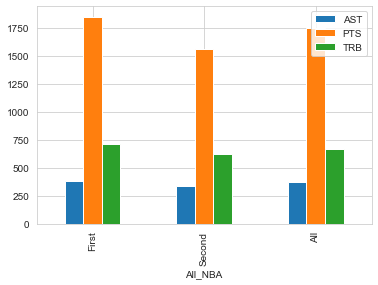

In [90]:
pivot = df.pivot_table(df[['AST', 'PTS', 'TRB']], #selecting needed columns
               index = 'All_NBA', #selecting index
               aggfunc = np.mean, #selecting aggregate function 
               margins = True ).plot(kind='bar') #column totals
# dfi.export(pivot, 'pivot.png')

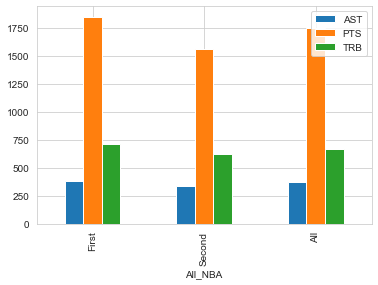

In [88]:
pivot.plot(kind = 'bar')
plt.savefig('pivot_plot')